<div style="text-align: center;">
    <h1>Kaggle Titanic Challenge 🚢</h1>
    <img src="./src/338ec5a6964c3cb1778b4ad6dc4da88e.gif" alt="Gif do Titanic" style="max-width: 100%; height: auto;">
</div>

---

## Libraries Used

This project uses the following Python libraries for data analysis and visualization:

- 🐼 **[Pandas](https://pandas.pydata.org/docs/)**: Data manipulation and analysis.
- 🔢 **[NumPy](https://numpy.org/doc/stable/)**: Support for mathematical operations and array manipulation.
- 📊 **[Matplotlib](https://matplotlib.org/stable/contents.html)**: Creation of basic graphs and visualizations.
- 🌊 **[Seaborn](https://seaborn.pydata.org/)**: Advanced and stylized statistical visualizations.
- 🤖 **[Scikit-learn](https://scikit-learn.org/stable/user_guide.html)**: Predictive modeling and machine learning.

Make sure to install all libraries before running the code. Use the command below to install them:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

---



In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("Data/train.csv")

---

## Titanic Challenge Summary

The Titanic Challenge on Kaggle is a binary classification task aimed at predicting whether a passenger survived the Titanic disaster based on their personal attributes and ticket details.

### Objective
Predict the `Survived` status (1 for survived, 0 for not survived) for each passenger in the test dataset using the training dataset.

### Dataset Overview
- **Training Data (`train.csv`)**: Contains labeled data (with `Survived` column).
- **Test Data (`test.csv`)**: Contains unlabeled data where predictions need to be made.

#### Key Features:
- `Survival`: 0 = No, 1 = Yes.
- `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Sex`: Gender of the passenger.
- `Age`: Age of the passenger.
- `SibSp`: Number of siblings/spouses aboard.
- `Parch`: Number of parents/children aboard.
- `Fare`: Ticket fare.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Evaluation
The predictions are evaluated using **accuracy**, calculated as the percentage of correctly predicted outcomes in the test set.

### Steps to Solve the Challenge
1. **Data Exploration**:
   - Analyze missing values, distributions, and correlations.
2. **Data Preprocessing**:
   - Fill missing values and encode categorical variables.
3. **Feature Engineering**:
   - Create new features like family size or categorize age groups.
4. **Model Building**:
   - Train machine learning models to predict survival.
5. **Submission**:
   - Generate predictions for the test set and submit to Kaggle.

### Tools Used
- Python for data analysis and modeling.
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.

For more details, visit the [Titanic Challenge on Kaggle](https://www.kaggle.com/c/titanic).

---

<div style="text-align: center;">
    <h1>1 - Correlation Matrix</h1>
</div>

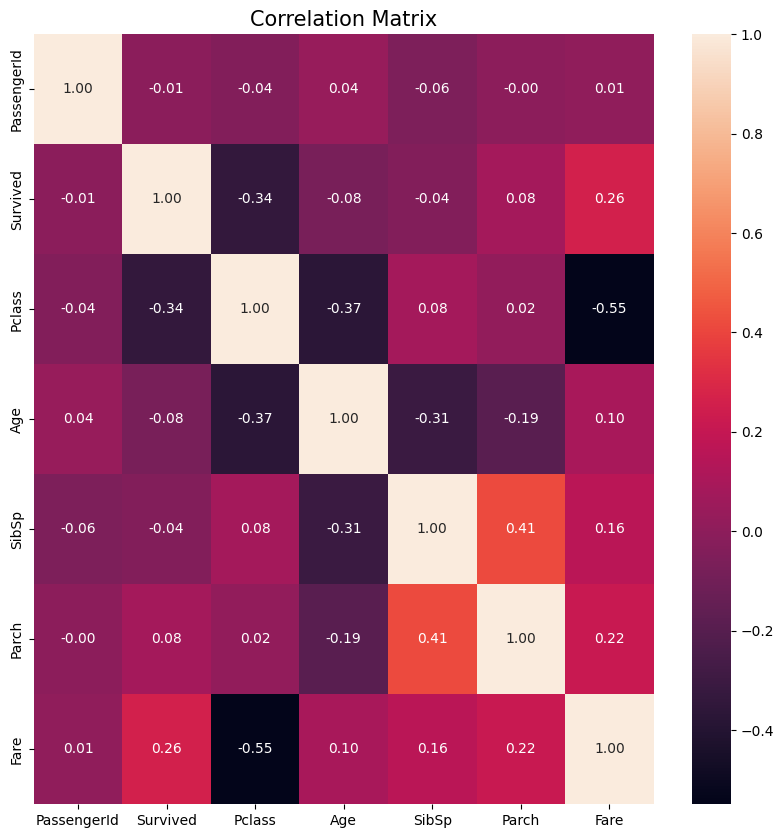

In [4]:
numerical_data = train.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)
plt.title('Correlation Matrix',fontsize=15)
plt.show()


---

<div style="text-align: center;">
    <h1>2 - Univariate Analysis</h1>
</div>


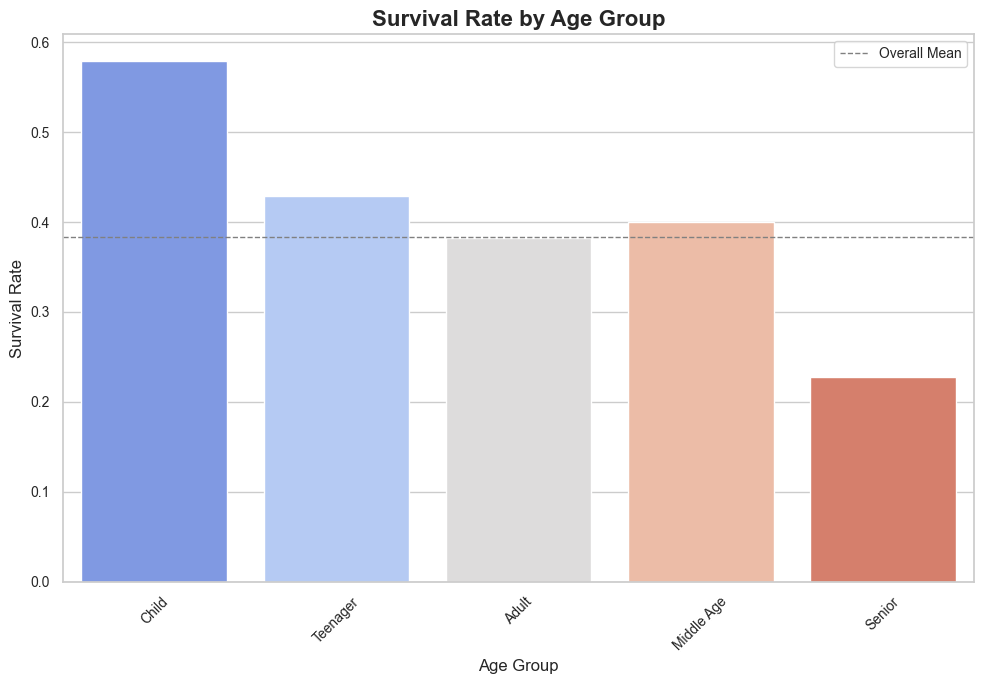

In [5]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 120], 
                           labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7))
sns.barplot(
    data=train, 
    x='AgeGroup', 
    y='Survived', 
    ci=None, 
    palette='coolwarm'
)

plt.title("Survival Rate by Age Group", fontsize=16, fontweight='bold')
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.axhline(y=train['Survived'].mean(), color='gray', linestyle='--', linewidth=1, label='Overall Mean')
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


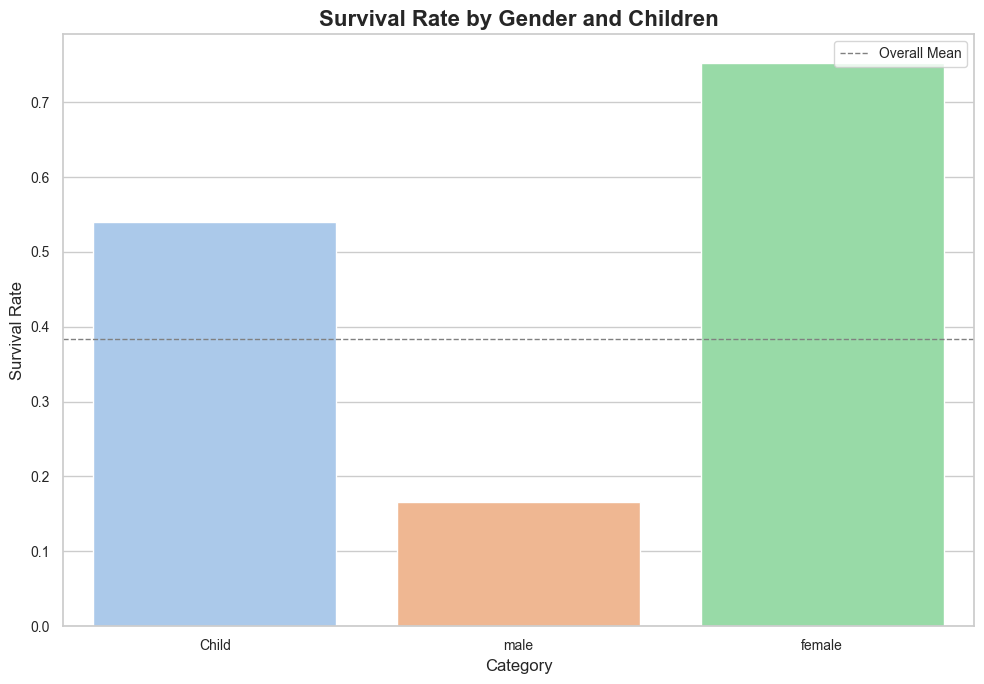

In [6]:
train['GenderChild'] = train.apply(
    lambda row: 'Child' if row['Age'] < 18 else row['Sex'], axis=1
)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=train, 
    x='GenderChild', 
    y='Survived', 
    errorbar=None, 
    order=['Child', 'male', 'female'], 
    palette='pastel'
)
plt.title("Survival Rate by Gender and Children", fontsize=16, fontweight='bold')
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=train['Survived'].mean(), color='gray', linestyle='--', linewidth=1, label='Overall Mean')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

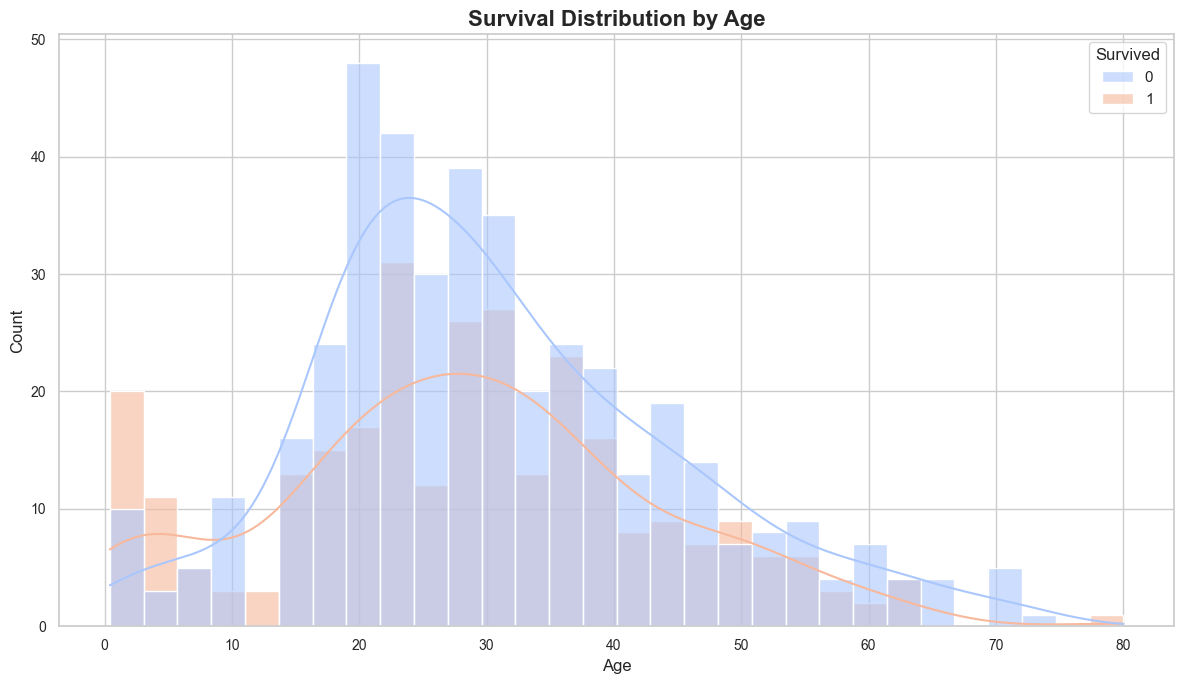

In [7]:
filtered_data = train.dropna(subset=['Age'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(
    data=filtered_data, 
    x='Age', 
    hue='Survived', 
    bins=30, 
    kde=True, 
    palette='coolwarm', 
    alpha=0.6
)
plt.title("Survival Distribution by Age", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

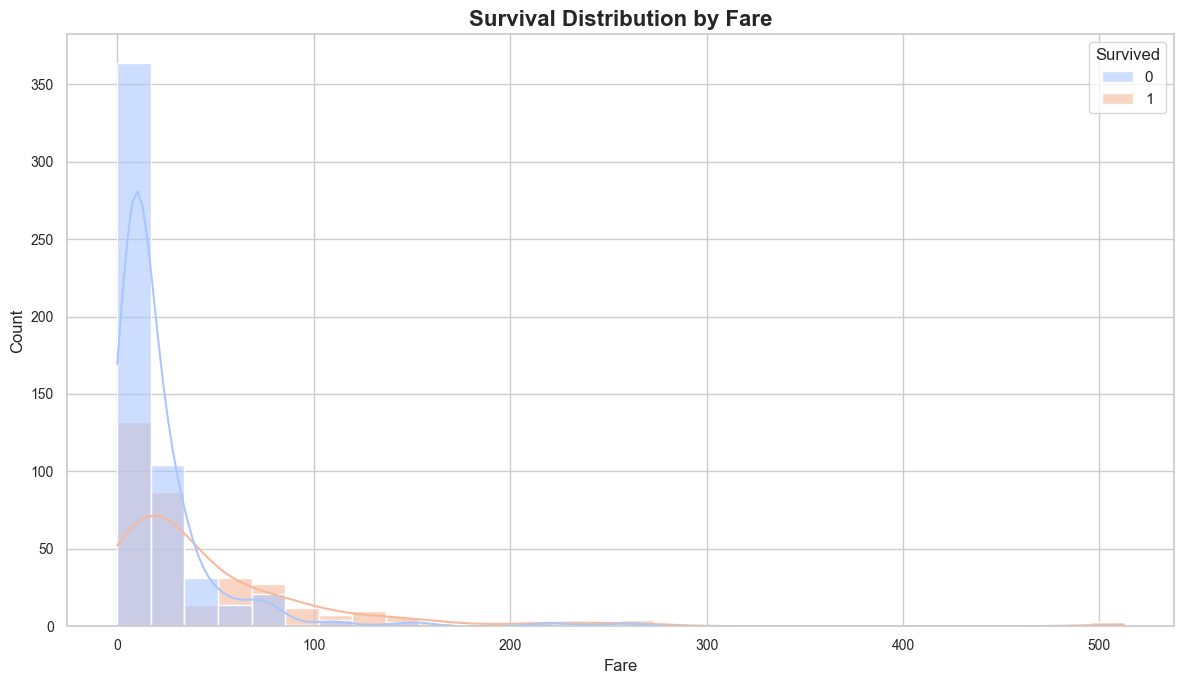

In [8]:
filtered_data_fare = train.dropna(subset=['Fare'])
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(
    data=filtered_data_fare, 
    x='Fare', 
    hue='Survived', 
    bins=30, 
    kde=True, 
    palette='coolwarm', 
    alpha=0.6
)
plt.title("Survival Distribution by Fare", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Fare", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64



---

<div style="text-align: center;">
    <h1>3 - Dealing with Outliers</h1>
</div>


In [10]:
train = train.drop(columns=['GenderChild', 'AgeGroup'])
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

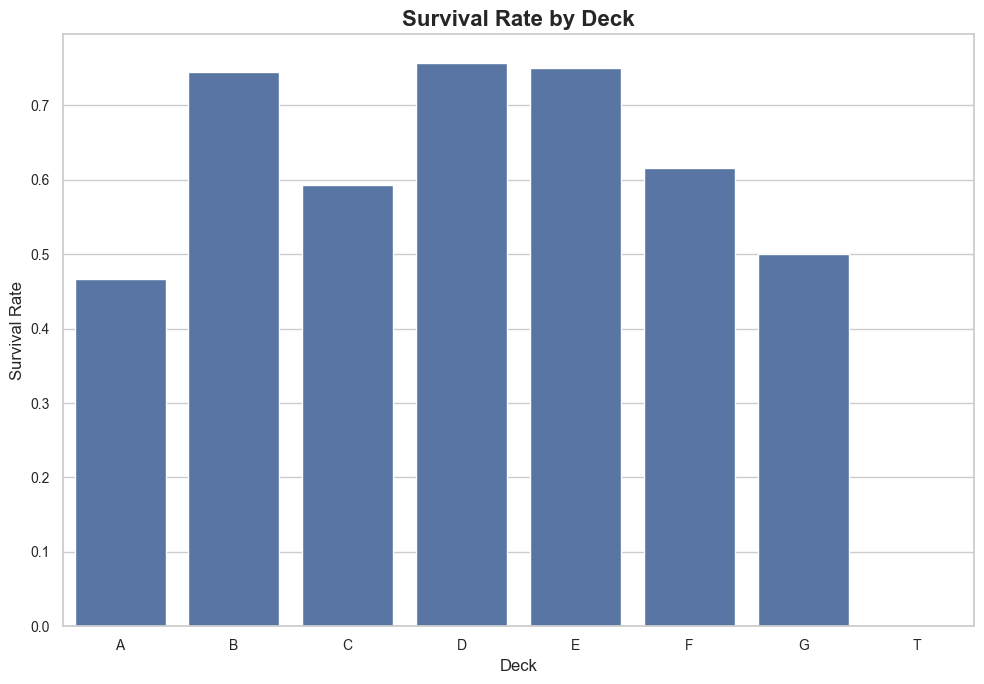

In [12]:
cabin_data = train.dropna(subset=['Cabin']).copy()
cabin_data.loc[:, 'Deck'] = cabin_data['Cabin'].str[0]

survivors_by_deck = cabin_data.groupby('Deck')['Survived'].mean().sort_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.barplot(x=survivors_by_deck.index, y=survivors_by_deck.values, errorbar=None)

plt.title("Survival Rate by Deck", fontsize=16, fontweight='bold')
plt.xlabel("Deck", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [13]:
cabin_data[cabin_data['Deck'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [14]:
cabin_data = cabin_data[cabin_data['Deck'] != 'T']

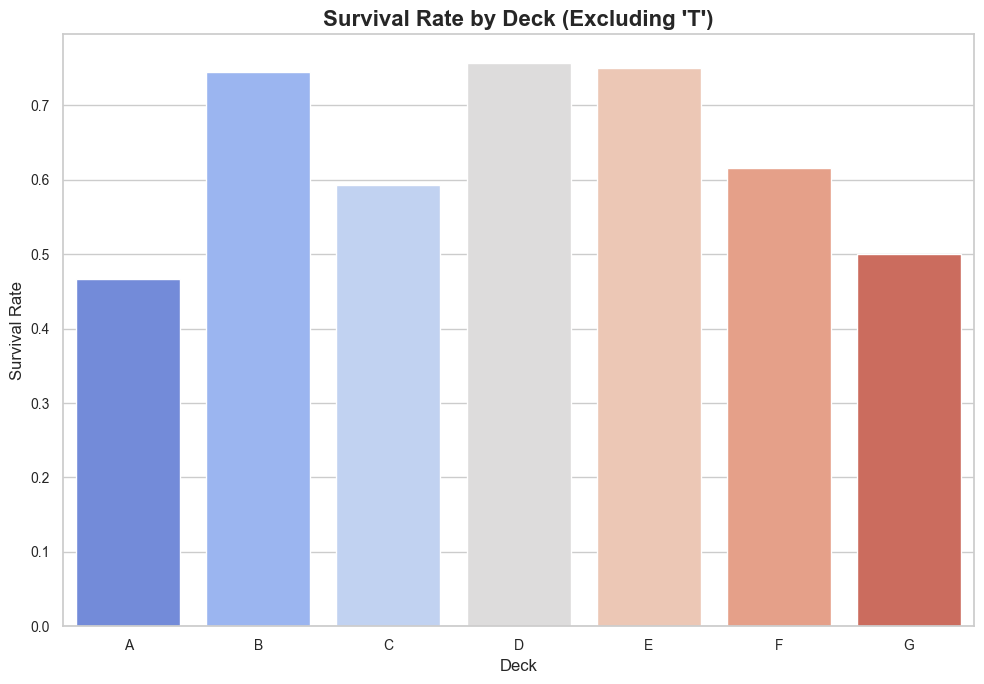

In [15]:
cabin_data = cabin_data[cabin_data['Deck'] != 'T']

survivors_by_deck = cabin_data.groupby('Deck')['Survived'].mean().sort_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.barplot(x=survivors_by_deck.index, y=survivors_by_deck.values, errorbar=None, palette="coolwarm")

plt.title("Survival Rate by Deck (Excluding 'T')", fontsize=16, fontweight='bold')
plt.xlabel("Deck", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
